#    Bollywood Movies & Indian Socio-economy: Trends, Genres & Impact

Data Analysis and visualizations prepared by - Vineet Rai

This research and analysis will focus on the trend of Bollywood movies, it’s subjects, popularity and nominations won over the years.
The motive is to analyze the trend and patterns of bollywood movies and it's audience.

I will try to put my observations to identify if there are any relations between the subjects of the movies, nominations and the generations over these 7 decades ranging from 1950-2019. 

I also tried to identify the socio-economic conditions and trend for India as a country.
Just as an experiment, based only over the available data and visualization methods, I try to analyze if there is any pattern and relation we may infer based on movies and socio-economic parameters.

Key indicators for movies data: Movies, imdb ratings/votes (people’s choice), genres, year_of_release, key crew (director, story, producer)

Key indicators used for socio-economic factors of India: population growth, per capita income over the last 50 years.

Datasets and methods: 
The key sources for data to do this analysis are as below:

1.	Movies, genres, crew, nominations, year, and related data from:
https://github.com/pncnmnp/TIMDB/tree/master/1950-2019
bollywood_crew.csv
bollywood_crew_data.csv
bollywood_full.csv
bollywood_writers_data.csv
2.	Socio-economic data for India over last 50 years, through:
https://databank.worldbank.org/reports.aspx?source=2&country=IND

In [1]:
#Importing required libraries and packages

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as ss

In [2]:
#Reading data files for bollywood movies dataset

bly_full = pd.read_csv(r'C:\Users\vinee\Documents\Vineet Learning\MS - Masters of Science\Indiana University\Data Visualization - Fall 2022\Project\bollywood_full.csv')
bly_crew = pd.read_csv(r'C:\Users\vinee\Documents\Vineet Learning\MS - Masters of Science\Indiana University\Data Visualization - Fall 2022\Project\bollywood_crew.csv')
bly_cr_data = pd.read_csv(r'C:\Users\vinee\Documents\Vineet Learning\MS - Masters of Science\Indiana University\Data Visualization - Fall 2022\Project\bollywood_crew_data.csv')
bly_wr_data = pd.read_csv(r'C:\Users\vinee\Documents\Vineet Learning\MS - Masters of Science\Indiana University\Data Visualization - Fall 2022\Project\bollywood_writers_data.csv')

In [3]:
bly_full.head(5)

title_x    imdb_id  \
0              Uri: The Surgical Strike  tt8291224   
1                         Battalion 609  tt9472208   
2  The Accidental Prime Minister (film)  tt6986710   
3                       Why Cheat India  tt8108208   
4                       Evening Shadows  tt6028796   

                                         poster_path  \
0  https://upload.wikimedia.org/wikipedia/en/thum...   
1                                                NaN   
2  https://upload.wikimedia.org/wikipedia/en/thum...   
3  https://upload.wikimedia.org/wikipedia/en/thum...   
4                                                NaN   

                                           wiki_link  \
0  https://en.wikipedia.org/wiki/Uri:_The_Surgica...   
1        https://en.wikipedia.org/wiki/Battalion_609   
2  https://en.wikipedia.org/wiki/The_Accidental_P...   
3      https://en.wikipedia.org/wiki/Why_Cheat_India   
4      https://en.wikipedia.org/wiki/Evening_Shadows   

                         title_y                 original_title  is_adult  \
0       Uri: The Surgical Strike       Uri: The Surgical Strike         0   
1                  Battalion 609                  Battalion 609         0   
2  The Accidental Prime Minister  The Accidental Prime Minister         0   
3                Why Cheat India                Why Cheat India         0   
4                Evening Shadows                Evening Shadows         0   

   year_of_release runtime            genres  imdb_rating  imdb_votes  \
0             2019     138  Action|Drama|War          8.4     35112.0   
1             2019     131               War          4.1        73.0   
2             2019     112   Biography|Drama          6.1      5549.0   
3             2019     121       Crime|Drama          6.0      1891.0   
4             2018     102             Drama          7.3       280.0   

                                               story  \
0  Divided over five chapters  the film chronicle...   
1  The story revolves around a cricket match betw...   
2  Based on the memoir by Indian policy analyst S...   
3  The movie focuses on existing malpractices in ...   
4  While gay rights and marriage equality has bee...   

                                             summary tagline  \
0  Indian army special forces execute a covert op...     NaN   
1  The story of Battalion 609 revolves around a c...     NaN   
2  Explores Manmohan Singh's tenure as the Prime ...     NaN   
3  The movie focuses on existing malpractices in ...     NaN   
4  Under the 'Evening Shadows'  truth often plays...     NaN   

                                              actors        wins_nominations  \
0  Vicky Kaushal|Paresh Rawal|Mohit Raina|Yami Ga...                  4 wins   
1  Vicky Ahuja|Shoaib Ibrahim|Shrikant Kamat|Elen...                     NaN   
2  Anupam Kher|Akshaye Khanna|Aahana Kumra|Atul S...                     NaN   
3  Emraan Hashmi|Shreya Dhanwanthary|Snighdadeep ...                     NaN   
4  Mona Ambegaonkar|Ananth Narayan Mahadevan|Deva...  17 wins & 1 nomination   

              release_date  
0    11 January 2019 (USA)  
1  11 January 2019 (India)  
2    11 January 2019 (USA)  
3    18 January 2019 (USA)  
4  11 January 2019 (India)

In [4]:
#Creating a dataframe with required columns and data cleaned-up:

bly_movies = bly_full.loc[:,['original_title', 'year_of_release', 'genres', 'imdb_rating', 'story', 'summary', 'wins_nominations']]
bly_movies = bly_movies[bly_movies.year_of_release != '/N']

#Verify that no movies with NULL year are present in the new dataframe
#bly_movies[bly_movies.year_of_release == '/N']

In [5]:
#Data Preparation and analysis - Analyzing the data and formats

bly_grouped = bly_movies.groupby(['year_of_release', 'genres', 'wins_nominations'], as_index=False).count()
bly_grouped.head(5)

year_of_release                   genres wins_nominations  original_title  \
0             1951    Drama|Musical|Romance     1 nomination               1   
1             1952                    Drama     1 nomination               1   
2             1952    Drama|Musical|Romance           2 wins               1   
3             1952            Drama|Romance            1 win               1   
4             1953  Biography|Drama|History     1 nomination               1   

   imdb_rating  story  summary  
0            1      1        1  
1            1      0        1  
2            1      1        1  
3            1      1        1  
4            1      1        1

In [6]:
#check unique genres
bly_grouped.genres.nunique()

174

In [7]:
#check unique count of years
bly_grouped.year_of_release.nunique()

69

Since the format of sample data made available through the imdb datasets is not well orgnized and is text heavy, we will have to use some clean up to extract numeric data, and use some assumptions.

The first to start with is splitting and refining the 'genres' into more meaningful categories.
As the data consists 174 unique genres combinations, let's try to split the genres into primary and secondary genres.
This can be done by using the split() and utilize the '|' demarcation provided in the datatset.

In [8]:
#split the genres to make more sense with a unique genre type columns

bly_movies[['genre1','genre2', 'genre3']] = bly_movies.genres.str.split("|",expand=True)
bly_movies.head(5)

original_title  year_of_release            genres  \
0       Uri: The Surgical Strike             2019  Action|Drama|War   
1                  Battalion 609             2019               War   
2  The Accidental Prime Minister             2019   Biography|Drama   
3                Why Cheat India             2019       Crime|Drama   
4                Evening Shadows             2018             Drama   

   imdb_rating                                              story  \
0          8.4  Divided over five chapters  the film chronicle...   
1          4.1  The story revolves around a cricket match betw...   
2          6.1  Based on the memoir by Indian policy analyst S...   
3          6.0  The movie focuses on existing malpractices in ...   
4          7.3  While gay rights and marriage equality has bee...   

                                             summary        wins_nominations  \
0  Indian army special forces execute a covert op...                  4 wins   
1  The story of Battalion 609 revolves around a c...                     NaN   
2  Explores Manmohan Singh's tenure as the Prime ...                     NaN   
3  The movie focuses on existing malpractices in ...                     NaN   
4  Under the 'Evening Shadows'  truth often plays...  17 wins & 1 nomination   

      genre1 genre2 genre3  
0     Action  Drama    War  
1        War   None   None  
2  Biography  Drama   None  
3      Crime  Drama   None  
4      Drama   None   None

We will consider the primary and secondary genres of the movie database, to identify the right selections and patterns.

genre1 -> Primary genre & genre2 -> secondary genre

Let's try to create a data visualization to see what were the shares of these primary genres in the overall movies history available from 1950-2022.

In [9]:
#Considering the primary genre of the movies, the share of most popular genres can be visualized as below:

bly_genre = bly_movies["genre1"].value_counts()
bly_numbers = bly_genre.index
bly_quantity = bly_genre.values

#Installing plotly package and using as below
import plotly.express as px

fig = px.pie(bly_movies, values=bly_quantity, names=bly_numbers)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4)

fig.update_layout(
    title_text="Primary Genres - Bollywood Movies 1950-2020",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Primary Genre', x=0.5, y=0.5, font_size=15, showarrow=False)])
fig.show()

Based on this sample data and pie chart visualization, we can identify that the genres like Action, Drama, Comedy and Romance were the biggest choice of filmmakers and naturally audience during the last 7 decades of Bollywood movies.

In [10]:
#Count of movies by genre during the period 1950-2019, available in imdb dataset sample
bly_genre

Action         1438
Drama          1401
Comedy          789
Crime           187
Romance         119
Musical          63
Adventure        62
Horror           62
Biography        49
Family           37
Mystery          35
Thriller         31
Fantasy          26
\N                8
Animation         8
Documentary       5
War               2
Music             2
History           2
Sci-Fi            1
Sport             1
Name: genre1, dtype: int64

In [11]:
#Let's check the secondary genres of overall movies available in the sample dataset:

genres = bly_movies["genre2"].value_counts()
numbers = genres.index
quantity = genres.values

#Installing plotly package and using as below
import plotly.express as px
fig = px.pie(bly_movies, values=quantity, names=numbers)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4)

fig.update_layout(
    title_text="Secondary Genres - Bollywood Movies 1950-2020",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Secondary Genre', x=0.5, y=0.5, font_size=15, showarrow=False)])
fig.show()

Based on the primary genres as mentioned in the sample movies dataset, we can infer that most popular genres over the last 7 decades have been: (Note the key assumption: The categorization is based on IMDB's definition or categorization as primary genre. To add more insights, we can also refer the secondary genres as well, as shown in the pie chart above)

The overall assumption based on above two analysis is to consider below popular genres (counts attached):

Genre          Counts

Action         1438
Drama          1401
Comedy          789
Crime           187
Romance         119
Musical          63

Let's focus on these popular genres first for the next exercises.

In [12]:
#Filter data based on war - genres

action_g = bly_movies['genres'].str.contains('Action', case=False, na=False)
action_movies = bly_movies[action_g].sort_values('year_of_release')
action_movies.head()

original_title  year_of_release                  genres  imdb_rating  \
4289          Amber             1952  Action|Adventure|Drama          6.7   
4284            Aan             1952  Action|Adventure|Drama          7.1   
4285            Aan             1952  Action|Adventure|Drama          7.1   
4277     Shahenshah             1953                  Action          4.6   
4273           Baaz             1953  Action|Adventure|Drama          7.0   

                                                  story  \
4289  Claiming to be a homeless orphan  young Amber ...   
4284  A Royal Indian family consists of the Emperor ...   
4285  A Royal Indian family consists of the Emperor ...   
4277                                                NaN   
4273  Nisha lives a poor lifestyle in the Portuguese...   

                                                summary wins_nominations  \
4289  A vengeful princess waits for the right moment...              NaN   
4284  A Royal Indian family consists of the Emperor ...              NaN   
4285  A Royal Indian family consists of the Emperor ...              NaN   
4277                                       Add a Plot »              NaN   
4273  Nisha lives a poor lifestyle in the Portuguese...              NaN   

      genre1     genre2 genre3  
4289  Action  Adventure  Drama  
4284  Action  Adventure  Drama  
4285  Action  Adventure  Drama  
4277  Action       None   None  
4273  Action  Adventure  Drama

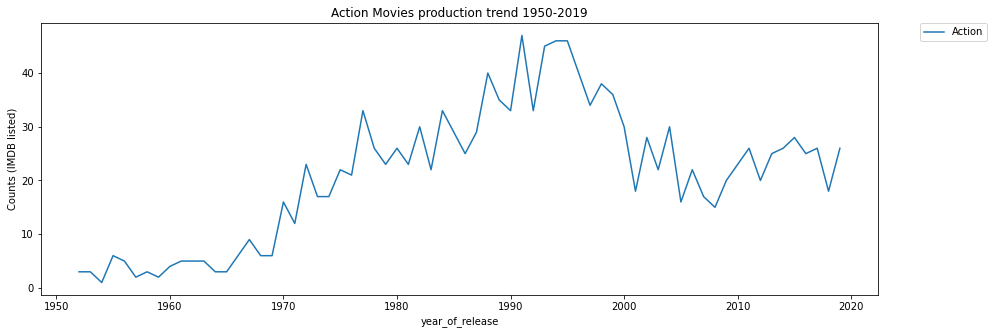

In [13]:
plt.figure(figsize = (15,5))
action_movies.groupby(action_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Action')
plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
plt.ylabel('Counts (IMDB listed)')
plt.title('Action Movies production trend 1950-2019')
plt.show()

By looking at the above graph, we can deduce some inferences as:

1. Action movies overall during the last 7 decades, have shown an increase in production, with a variation of growth trend.
2. The peak production years during this selected time period (1950-2019) was the 1990s. During late 80s till late 90s, the production of action movies were at it's peak.
3. Action movies production took a hit and showed a slowed down pattern post 2000s.

Let's look at the other genres trend, and we can compare these to find more insights.

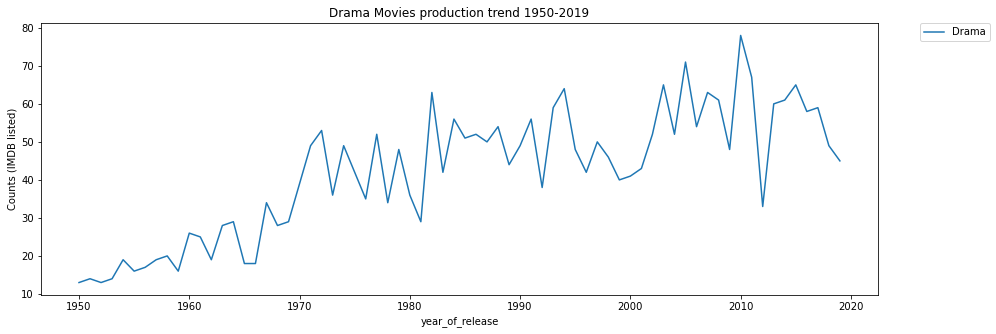

In [14]:
#Filter data based on Drama - genres
drama_g = bly_movies['genres'].str.contains('drama', case=False, na=False)
drama_movies = bly_movies[drama_g].sort_values('year_of_release')
#drama_movies.head()
plt.figure(figsize = (15,5))
drama_movies.groupby(drama_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Drama')
plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

plt.ylabel('Counts (IMDB listed)')
plt.title('Drama Movies production trend 1950-2019')

plt.show()

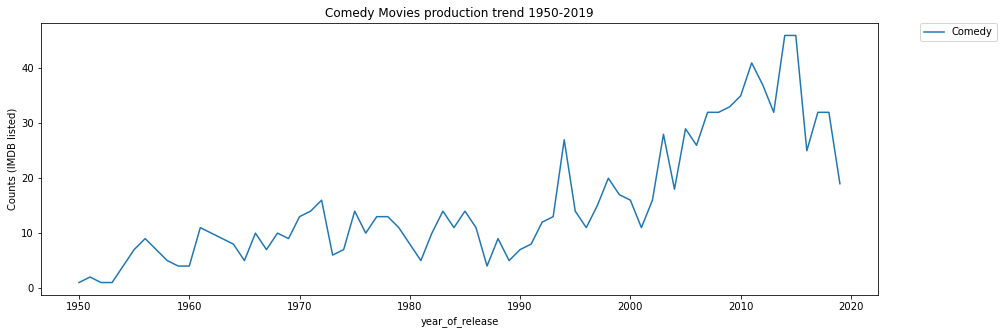

In [15]:
#Filter data based on Romance - genres
comedy_g = bly_movies['genres'].str.contains('Comedy', case=False, na=False)
comedy_movies = bly_movies[comedy_g].sort_values('year_of_release')
#romance_movies.head()
plt.figure(figsize = (15,5))
comedy_movies.groupby(comedy_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Comedy')
plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
plt.ylabel('Counts (IMDB listed)')
plt.title('Comedy Movies production trend 1950-2019')
plt.show()

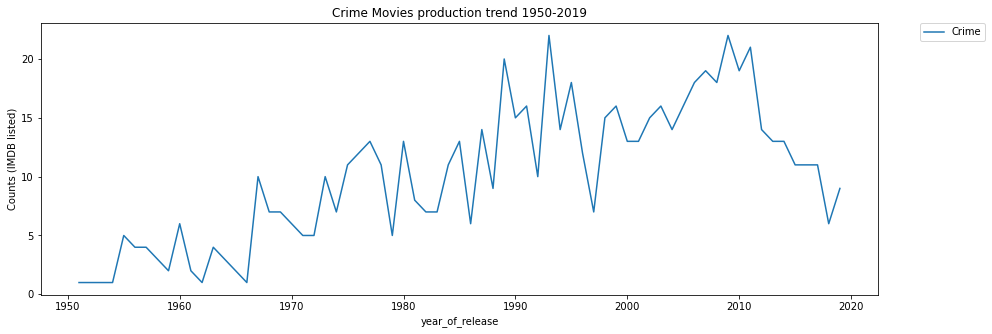

In [16]:
#Filter data based on crime - genres
crime_g = bly_movies['genres'].str.contains('Crime', case=False, na=False)
crime_movies = bly_movies[crime_g].sort_values('year_of_release')
#crime_movies.head()
plt.figure(figsize = (15,5))
crime_movies.groupby(crime_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Crime')
plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
plt.ylabel('Counts (IMDB listed)')
plt.title('Crime Movies production trend 1950-2019')
plt.show()

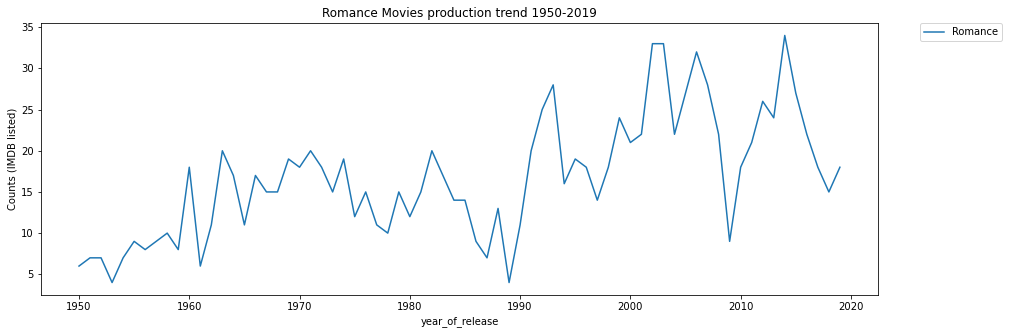

In [17]:
#Filter data based on romance - genres
romance_g = bly_movies['genres'].str.contains('Romance', case=False, na=False)
romance_movies = bly_movies[romance_g].sort_values('year_of_release')
#romance_movies.head()
plt.figure(figsize = (15,5))
romance_movies.groupby(romance_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Romance')
plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
plt.ylabel('Counts (IMDB listed)')
plt.title('Romance Movies production trend 1950-2019')
plt.show()

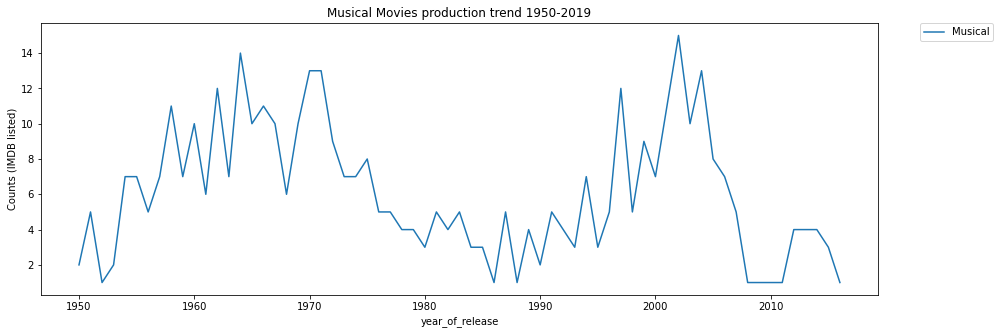

In [18]:
#Filter data based on musical - genres
musical_g = bly_movies['genres'].str.contains('Musical', case=False, na=False)
musical_movies = bly_movies[musical_g].sort_values('year_of_release')
#musical_movies.head()
plt.figure(figsize = (15,5))
musical_movies.groupby(musical_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Musical')
plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
plt.ylabel('Counts (IMDB listed)')
plt.title('Musical Movies production trend 1950-2019')
plt.show()

The trend of Musical movies genre is interesting as we can see there is a steep decline during the period 1970s-1990s.
The musical genre gains popularity in production back for a couple of decades, and then falling down again post mid-2000s.

This overlaps with the phase when action movies gained lot steep incline.

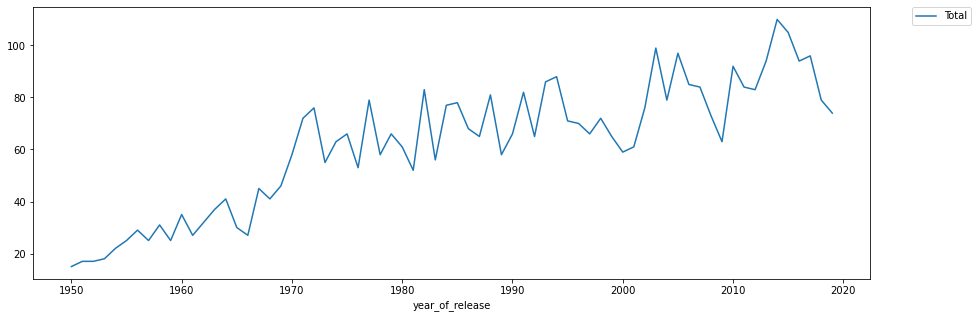

In [19]:
#Overall movies vs year
plt.figure(figsize = (15,5))
bly_movies.sort_values('year_of_release').groupby(bly_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Total')
plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
plt.show()

Based on the data made available by IMDB's sample dataset, and as we analyzed each of the most popular genres as above, let's try to plot all these genres in a single plots for a comparable visualization:

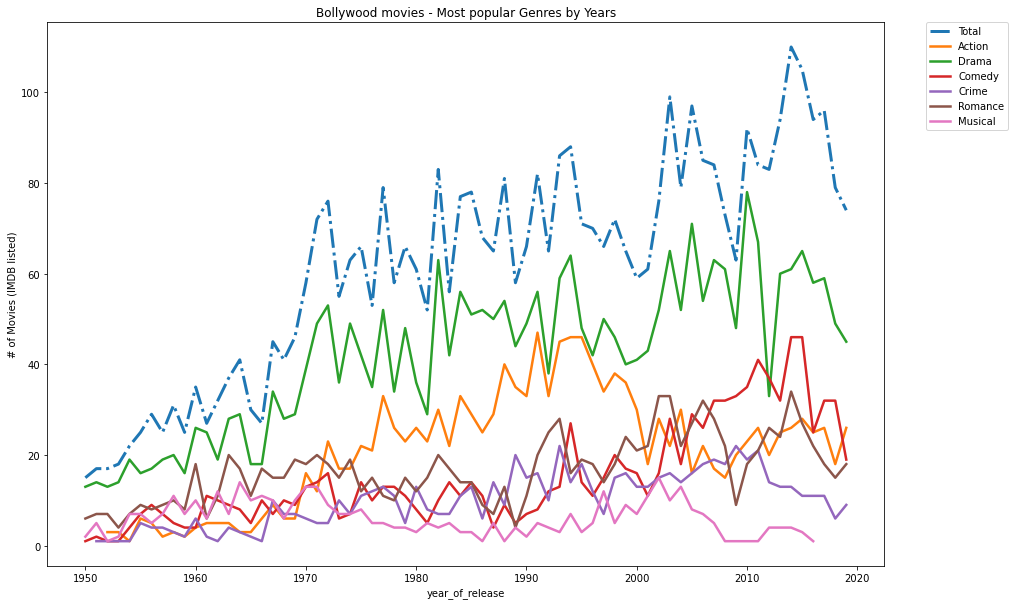

In [20]:
plt.figure(figsize = (15,10))

bly_movies.sort_values('year_of_release').groupby(bly_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Total', linewidth=3, linestyle = 'dashdot')

action_movies.groupby(action_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Action', linewidth=2.5)

drama_movies.groupby(drama_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Drama', linewidth=2.5)

comedy_movies.groupby(comedy_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Comedy', linewidth=2.5)

crime_movies.groupby(crime_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Crime', linewidth=2.5)

romance_movies.groupby(romance_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Romance', linewidth=2.5)

musical_movies.groupby(musical_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Musical', linewidth=2.5)

plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
plt.ylabel('# of Movies (IMDB listed)')
plt.title('Bollywood movies - Most popular Genres by Years')
plt.show()

Looking at the collective graph showing trends of overall movies in the sample dataset, 
as well as the trend for all the top 6 popular genres, we can infer that:
    
1. There has been a consistent 'overall' growth trend in number of movies produced in last 7 decades.
2. The most popular genre in Bollywood movies consistently has been 'Drama'. Afterall, who doesn't love drama!! :)
3. Surprisingly, the share of action movies which showed a growth from 1950-1990s, started falling down after the late 90s. 
Does that mean the action heroes started getting old, and were replaced by the romantic young generation?? Very likely!! :)
4. Comedy and Romance genres shows a trend of growth but comparatively a slower one. We need to laugh more and be more romantic!! I would like to see a higher growth rate of comedy movies, won't you?? 
Luckily, after the 2000s, comedy and romance genres are showing steeper rise, which indicates a good sign!
5. Musical movies are one of the most fluctuating genres. As we can see that during the period 1950s-1970s there was a nice growth, however the musical movies subject took a big hit during the period 1970-2000, and then a uptick with a steep and down again.

Let's do a quick analysis to see 'How much do people perceive and rate the Indian movies as per IMDB ratings?'
What is the general perception of masses over the area, considering what is the percentage of movies getting how much imdb_ratings.
Steps:
1. Round off all imdb_ratings in the dataframe to create a distinct 0-10 integer range
2. Draw a simple pie chart to aggregate overall movies in the sample dataset, and check the share of movies and their imdb_ratings.

This will provide a high level 'likeness' and 'quality' idea of all Bollywood movies!! :)

In [21]:
#Round off the imdb_rating numbers

bly_movies = bly_movies.round()
bly_movies.head()

original_title  year_of_release            genres  \
0       Uri: The Surgical Strike             2019  Action|Drama|War   
1                  Battalion 609             2019               War   
2  The Accidental Prime Minister             2019   Biography|Drama   
3                Why Cheat India             2019       Crime|Drama   
4                Evening Shadows             2018             Drama   

   imdb_rating                                              story  \
0          8.0  Divided over five chapters  the film chronicle...   
1          4.0  The story revolves around a cricket match betw...   
2          6.0  Based on the memoir by Indian policy analyst S...   
3          6.0  The movie focuses on existing malpractices in ...   
4          7.0  While gay rights and marriage equality has bee...   

                                             summary        wins_nominations  \
0  Indian army special forces execute a covert op...                  4 wins   
1  The story of Battalion 609 revolves around a c...                     NaN   
2  Explores Manmohan Singh's tenure as the Prime ...                     NaN   
3  The movie focuses on existing malpractices in ...                     NaN   
4  Under the 'Evening Shadows'  truth often plays...  17 wins & 1 nomination   

      genre1 genre2 genre3  
0     Action  Drama    War  
1        War   None   None  
2  Biography  Drama   None  
3      Crime  Drama   None  
4      Drama   None   None

In [22]:
#Considering the imdb_rating, let's try to see how the movies are rated and liked:

bly_ratings = bly_movies["imdb_rating"].value_counts()
bly_num = bly_ratings.index
bly_qty = bly_ratings.values

#Installing plotly package and using as below
import plotly.express as px

fig = px.pie(bly_movies, values=bly_qty, names=bly_num, hole = 0.3)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4)

fig.update_layout(
    title_text="How much do we like Bollywood movies?",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='IMDB Ratings Share', x=0.5, y=0.5, font_size=10, showarrow=False)])
fig.show()

Looking at this interesting pie chart, we can infer that almost 90% of the Bollywood movies are rated 7 or below.
However, approximately 75% of the movies are rated between 5-7, which we can consider as average liking and quality.

On the bright side, approximately 10% of the movies are rated as 8-9. None are rated 10 as per the IMDB ratings.

A lot needs to be done to keep the bollywood audience happier, and the good thing is that the work is in good progress!
How do I know this? Let's have a look at the wins and nominations trend as a next step to know more!

Let's do some more analysis now, looking at the wins and npminations of movies in different genres, across the years.
Steps:
1. Clean up and organize the data to segregate the wins and nominations.
2. Do proper formatting of the data columns and types
3. Create visualizationas and find out the trend of overall wins and nominations of movies in these popular genres
4. Compare the visual analysis and trend

As the field 'wins_nominations' is more a free text format including both wins and niminations numbers, we need to find a way to extract the numbers in a numerical format from this text field.
One of the way I can think of is to:
1. Split the field using the '&' demarcation. Thanksfully this is a very consistent demarcation throughout the sample data set.
2. After creating 2 new columns, let's replace the text and retain the numerical data.
3. Change the new derived fields to numeric datatype and use for the data visualization.

In [23]:
#Split the field using the '&' demarcation

bly_movies[['wins','nominations']] = bly_movies.wins_nominations.str.split("&",expand=True)
bly_movies.head(5)

original_title  year_of_release            genres  \
0       Uri: The Surgical Strike             2019  Action|Drama|War   
1                  Battalion 609             2019               War   
2  The Accidental Prime Minister             2019   Biography|Drama   
3                Why Cheat India             2019       Crime|Drama   
4                Evening Shadows             2018             Drama   

   imdb_rating                                              story  \
0          8.0  Divided over five chapters  the film chronicle...   
1          4.0  The story revolves around a cricket match betw...   
2          6.0  Based on the memoir by Indian policy analyst S...   
3          6.0  The movie focuses on existing malpractices in ...   
4          7.0  While gay rights and marriage equality has bee...   

                                             summary        wins_nominations  \
0  Indian army special forces execute a covert op...                  4 wins   
1  The story of Battalion 609 revolves around a c...                     NaN   
2  Explores Manmohan Singh's tenure as the Prime ...                     NaN   
3  The movie focuses on existing malpractices in ...                     NaN   
4  Under the 'Evening Shadows'  truth often plays...  17 wins & 1 nomination   

      genre1 genre2 genre3      wins    nominations  
0     Action  Drama    War    4 wins           None  
1        War   None   None       NaN            NaN  
2  Biography  Drama   None       NaN            NaN  
3      Crime  Drama   None       NaN            NaN  
4      Drama   None   None  17 wins    1 nomination

As we can see that still the new columns are not numerical values of wins and nimination, more data clean up is needed here. Let's replace the text part 'win' and 'nomination' from the columns and change it to a numerical field.

In [24]:
#let's replace the text and retain the numerical data.

bly_movies['wins'] = bly_movies['wins'].str.replace(r'\D', '')
bly_movies['nominations'] = bly_movies['nominations'].str.replace(r'\D', '')
bly_movies.head(5)

<ipython-input-24-8e457e131bc9>:3: FutureWarning:

The default value of regex will change from True to False in a future version.

<ipython-input-24-8e457e131bc9>:4: FutureWarning:

The default value of regex will change from True to False in a future version.



original_title  year_of_release            genres  \
0       Uri: The Surgical Strike             2019  Action|Drama|War   
1                  Battalion 609             2019               War   
2  The Accidental Prime Minister             2019   Biography|Drama   
3                Why Cheat India             2019       Crime|Drama   
4                Evening Shadows             2018             Drama   

   imdb_rating                                              story  \
0          8.0  Divided over five chapters  the film chronicle...   
1          4.0  The story revolves around a cricket match betw...   
2          6.0  Based on the memoir by Indian policy analyst S...   
3          6.0  The movie focuses on existing malpractices in ...   
4          7.0  While gay rights and marriage equality has bee...   

                                             summary        wins_nominations  \
0  Indian army special forces execute a covert op...                  4 wins   
1  The story of Battalion 609 revolves around a c...                     NaN   
2  Explores Manmohan Singh's tenure as the Prime ...                     NaN   
3  The movie focuses on existing malpractices in ...                     NaN   
4  Under the 'Evening Shadows'  truth often plays...  17 wins & 1 nomination   

      genre1 genre2 genre3 wins nominations  
0     Action  Drama    War    4        None  
1        War   None   None  NaN         NaN  
2  Biography  Drama   None  NaN         NaN  
3      Crime  Drama   None  NaN         NaN  
4      Drama   None   None   17           1

In [25]:
#replace the NULl values with 0:

bly_movies['wins'] = bly_movies['wins'].fillna(0)

bly_movies['nominations'] = bly_movies['nominations'].fillna(0)
bly_movies.head(5)

original_title  year_of_release            genres  \
0       Uri: The Surgical Strike             2019  Action|Drama|War   
1                  Battalion 609             2019               War   
2  The Accidental Prime Minister             2019   Biography|Drama   
3                Why Cheat India             2019       Crime|Drama   
4                Evening Shadows             2018             Drama   

   imdb_rating                                              story  \
0          8.0  Divided over five chapters  the film chronicle...   
1          4.0  The story revolves around a cricket match betw...   
2          6.0  Based on the memoir by Indian policy analyst S...   
3          6.0  The movie focuses on existing malpractices in ...   
4          7.0  While gay rights and marriage equality has bee...   

                                             summary        wins_nominations  \
0  Indian army special forces execute a covert op...                  4 wins   
1  The story of Battalion 609 revolves around a c...                     NaN   
2  Explores Manmohan Singh's tenure as the Prime ...                     NaN   
3  The movie focuses on existing malpractices in ...                     NaN   
4  Under the 'Evening Shadows'  truth often plays...  17 wins & 1 nomination   

      genre1 genre2 genre3 wins nominations  
0     Action  Drama    War    4           0  
1        War   None   None    0           0  
2  Biography  Drama   None    0           0  
3      Crime  Drama   None    0           0  
4      Drama   None   None   17           1

In [26]:
#Change the datatype of both win and nomination fields to integer

bly_movies['wins'] = bly_movies['wins'].astype(int)
bly_movies['nominations'] = bly_movies['nominations'].astype(int)

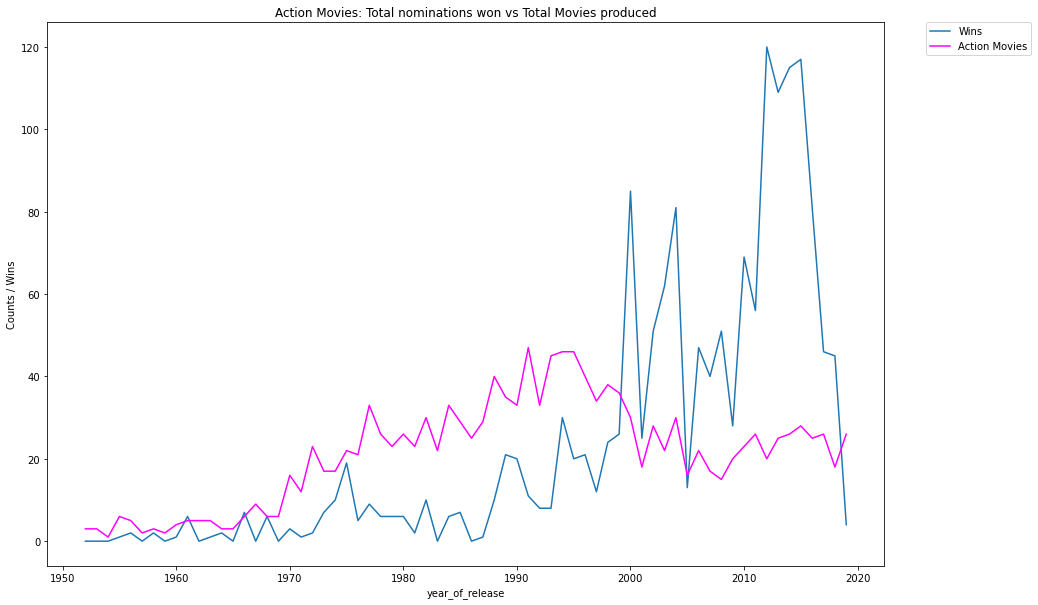

In [27]:
# Trend analysis of 'Action' movies winning of nominations:

plt.figure(figsize = (15,10))

#Filter data based on action - genres and get the total 'wins' secured for the year
action_wins = bly_movies['genres'].str.contains('action', case=False, na=False)
action_winners = bly_movies[action_wins].sort_values('year_of_release')
action_winners.groupby(action_winners['year_of_release'], sort=False)['wins'].sum().plot(label = 'Wins')
plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

#Graph for year vs genre popularity trend

action_movies.groupby(action_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Action Movies', color = 'magenta')
plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
#plt.xticks(np.arange(0, 30, step = 5))

plt.ylabel("Counts / Wins")
plt.title("Action Movies: Total nominations won vs Total Movies produced")
plt.show()

The above comparative analysis is indeed very interesting. My inferences here are summarized in below points:
1. Looking at the trend of number of movies in 'Action' genre, there is an overall growth in numbers and popularity as we can see the overall increasing graph from 1950-2020.

2. If we look at the 'Wins' line and trend, it seems the action movies were not winning much nominations during the initial decades from 1950-2000.

3. However, we see there is huge spike during the later decades i.e. from 2000-2020.

4. The actions movies won a lot of nominations even though the overall number of action movies per year decreased.

5. This indicates that Bollywood movie makers, scaled up the movie qualities rather than focused on quantities.

6. People loved these action movies and these action movies won a whopping niminations, fo ex:
    Dabangg (2010) - won 50 nominations and similarly movies Kick, Gangs of Wasseypur, Sultan, Chennai Express just changed the trend of winnings by movies in 'Action' Genres.
    

Let's look at the other popular genres and corresponding wins they secured and the trend:

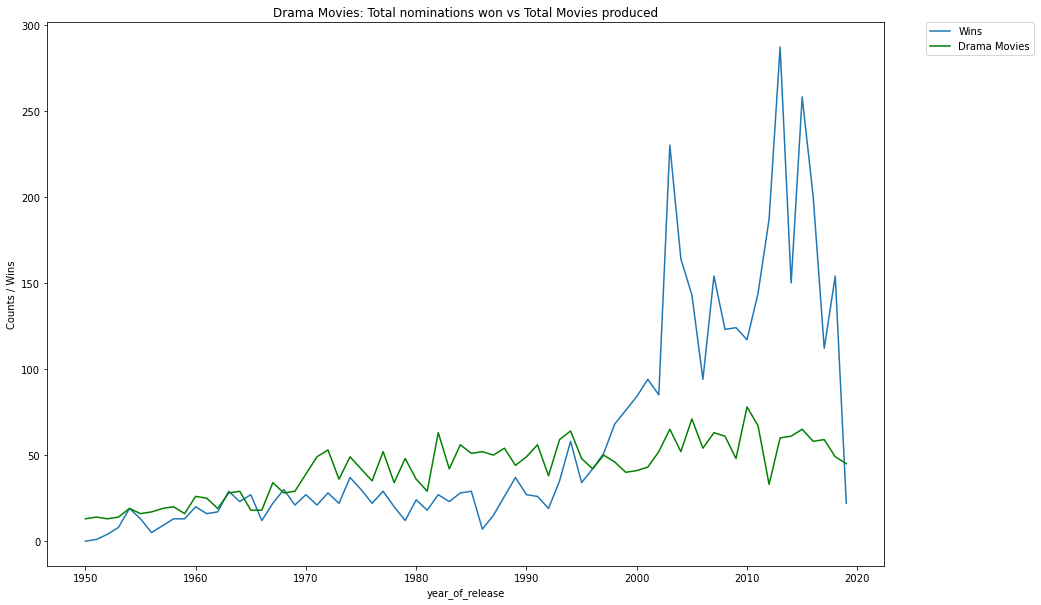

In [28]:
# Drama genre: Wins vs Movies produced

plt.figure(figsize = (15,10))

#Filter data based on drama - genres and get the total 'wins' secured for the year
drama_wins = bly_movies['genres'].str.contains('drama', case=False, na=False)
drama_winners = bly_movies[drama_wins].sort_values('year_of_release')
drama_winners.groupby(drama_winners['year_of_release'], sort=False)['wins'].sum().plot(label = 'Wins')
plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

#Graph for year vs genre popularity trend

drama_movies.groupby(drama_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Drama Movies', color = 'green')
plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
#plt.xticks(np.arange(0, 30, step = 5))
plt.ylabel("Counts / Wins")
plt.title("Drama Movies: Total nominations won vs Total Movies produced")
plt.show()

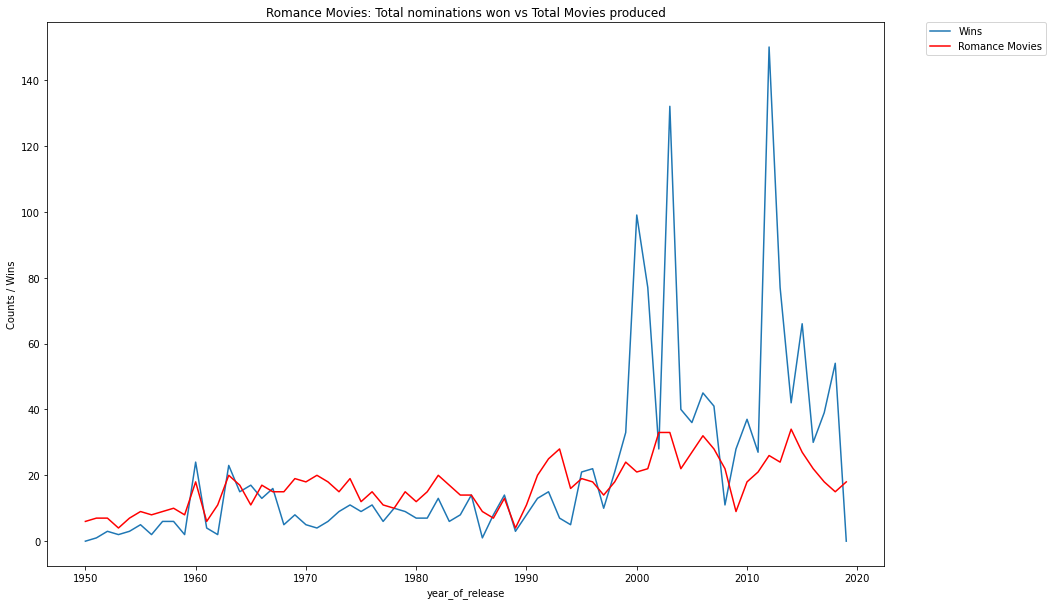

In [29]:
# Dram genre: Wins vs Movies produced

plt.figure(figsize = (15,10))

#Filter data based on romance - genres and get the total 'wins' secured for the year
romance_wins = bly_movies['genres'].str.contains('romance', case=False, na=False)
romance_winners = bly_movies[romance_wins].sort_values('year_of_release')
romance_winners.groupby(romance_winners['year_of_release'], sort=False)['wins'].sum().plot(label = 'Wins')
plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

#Graph for year vs genre popularity trend

romance_movies.groupby(romance_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Romance Movies', color = 'red')
plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
#plt.xticks(np.arange(0, 30, step = 5))
plt.ylabel("Counts / Wins")
plt.title("Romance Movies: Total nominations won vs Total Movies produced")
plt.show()

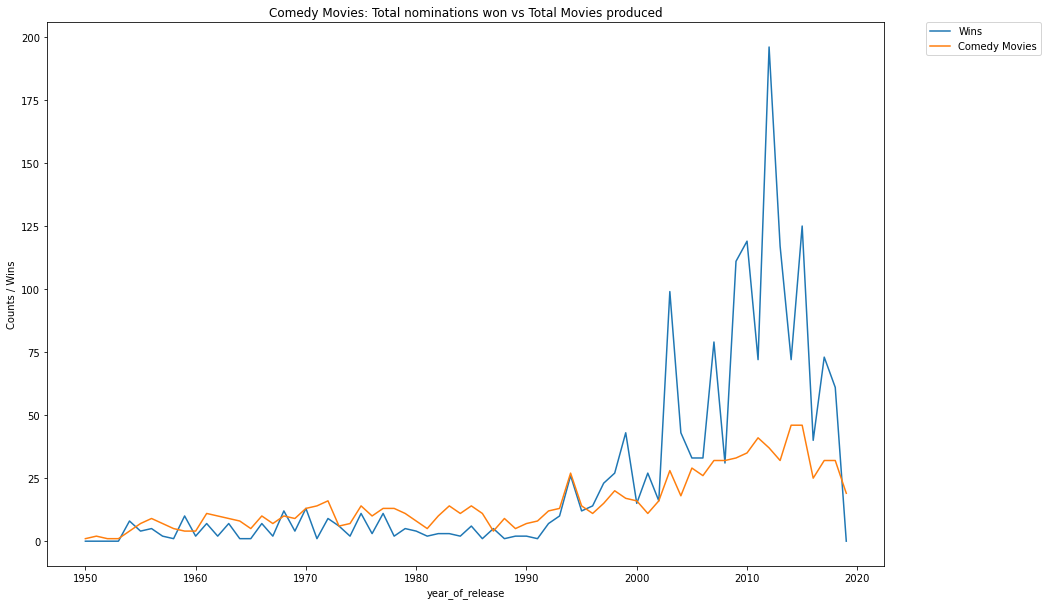

In [30]:
# Comedy genre: Wins vs Movies produced

plt.figure(figsize = (15,10))

#Filter data based on Comedy - genres and get the total 'wins' secured for the year
comedy_wins = bly_movies['genres'].str.contains('Comedy', case=False, na=False)
comedy_winners = bly_movies[comedy_wins].sort_values('year_of_release')
comedy_winners.groupby(comedy_winners['year_of_release'], sort=False)['wins'].sum().plot(label = 'Wins')
plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)

#Graph for year vs genre popularity trend

comedy_movies.groupby(comedy_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Comedy Movies')
plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
#plt.xticks(np.arange(0, 30, step = 5))
plt.ylabel("Counts / Wins")
plt.title("Comedy Movies: Total nominations won vs Total Movies produced")
plt.show()

A very similar trend as we see for Action movies, is what is getting displayed for other 3 genres as well namely Comedy, Drama and Roamnce.
This may be a great indicator of how the quality of Bollywood movies, volume of audience and nomination categories have improved and increased over the period. 
Certainly a great positive trend on the quality of movies and viewerships!

Let's look at the comparison of how the different genres did amond themselves on nomination wins throughout the time period available as part of this sample dataset.
We will plot them all together to see the comparative trend. (just considering the genres - Action, Romance, Drama and Comedy for simplicity and relevance)

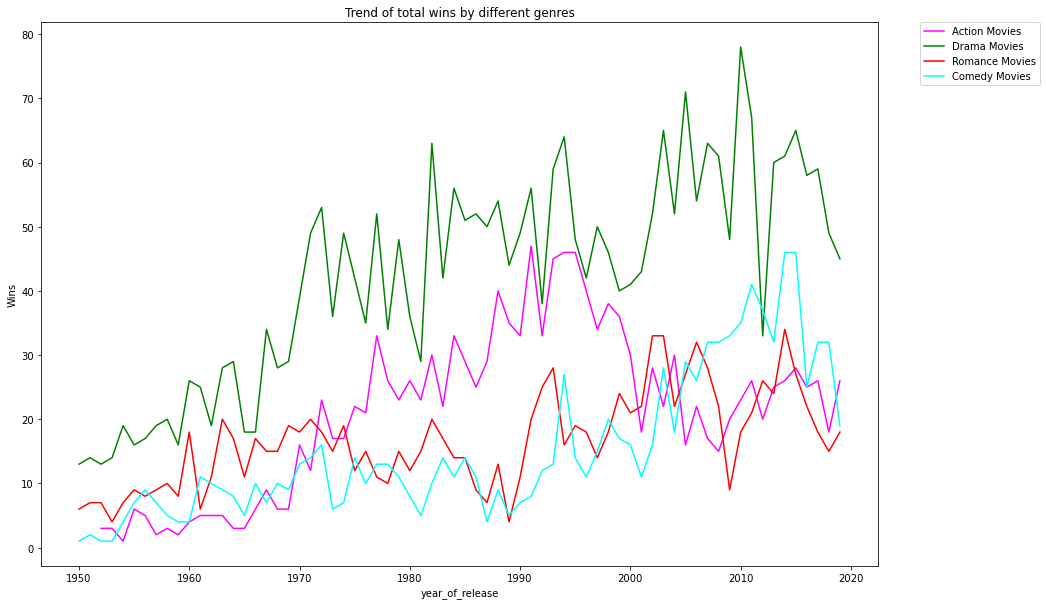

In [31]:
plt.figure(figsize = (15,10))

action_movies.groupby(action_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Action Movies', color = 'magenta')
drama_movies.groupby(drama_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Drama Movies', color = 'green')
romance_movies.groupby(romance_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Romance Movies', color = 'red')
comedy_movies.groupby(comedy_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Comedy Movies', color = 'cyan')

plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper left', borderaxespad=0.)
plt.ylabel('Wins')
plt.title('Trend of total wins by different genres')

plt.show()

Quick inferences looking at the wins vs genres trend as above:
1. It shows clearly that Bollywood movies under Drama genre are consistently the top winners of nominations.
2. The action movies during the 80s and 90s were gaining quiet popularity, however meets a decline post 2000.
3. Comedy movies show an interesting incline in wins post 200s.

Time to think - is the new generation liking more drama and comedy? Quiet likely! :)

Now, let's have a look at some social factors of the audience and masses in India, that is the movie audience assuming there is a relation and reach of population's choice over the type and quantities of movies made.
Let's analyze the growth trajectory of Per Capita Income of Indian population over the several decades. May be this gives us some visual patterns! 
Source of data: Socio-economic data for India over last 50 years, through:
https://databank.worldbank.org/reports.aspx?source=2&country=IND


In [32]:
#Data downloaded from the worldbank public data repository as credited above
#Reading the downloaded data in csv format to a dataframe:

ind_pop = pd.read_csv(r'C:\Users\vinee\Documents\Vineet Learning\MS - Masters of Science\Indiana University\Data Visualization - Fall 2022\Project\India_World_Bank.csv')
ind_pop.head()

Country Name Country Code  \
0        India          IND   
1        India          IND   
2        India          IND   
3        India          IND   
4        India          IND   

                                         Series Name     Series Code  \
0                                  Population, total     SP.POP.TOTL   
1                       Population growth (annual %)     SP.POP.GROW   
2                              Surface area (sq. km)  AG.SRF.TOTL.K2   
3  Population density (people per sq. km of land ...     EN.POP.DNST   
4  Poverty headcount ratio at national poverty li...     SI.POV.NAHC   

      1972 [YR1972]     1973 [YR1973]     1974 [YR1974]     1975 [YR1975]  \
0         581087255         594770136         608802595         623102900   
1  2.30118919711835  2.32740785532689    2.331906416989  2.32176046659916   
2           3287260           3287260           3287260           3287260   
3   195.44235484446  200.044442501152  204.764106902014  209.573858381065   
4                ..                ..                ..                ..   

      1976 [YR1976]     1977 [YR1977]  ...     2012 [YR2012]  \
0         637630085         652408766  ...        1265780243   
1  2.30466374302148  2.29129960804159  ...  1.23148489388617   
2           3287260           3287260  ...           3287260   
3  214.459918471406  219.430566495919  ...  425.731366982938   
4                ..                ..  ...                ..   

      2013 [YR2013]     2014 [YR2014]     2015 [YR2015]     2016 [YR2016]  \
0        1280842119        1295600768        1310152392        1324517250   
1  1.18290421490412  1.14567340150608  1.11689591278599  1.09045932094686   
2           3287260           3287260           3287260           3287260   
3  430.797264554233  435.761175034223  440.655454915428  445.486918091343   
4                ..                ..                ..                ..   

      2017 [YR2017]     2018 [YR2018]     2019 [YR2019]      2020 [YR2020]  \
0        1338676779        1352642283        1366417756         1380004385   
1  1.06335942989132  1.03782784787162  1.01326124930492  0.989413800188014   
2           3287260           3287260           3287260            3287260   
3   450.24932109956  454.946465917079  459.579695882201   464.149410229417   
4                ..                ..                ..                 ..   

       2021 [YR2021]  
0         1393409033  
1  0.966660959674886  
2                 ..  
3                 ..  
4                 ..  

[5 rows x 54 columns]

Let's organize and clean up the data in more readable format, as well as one more useful for developing the visulizations.
For cleaning up and organizing the data, let's first pivot the Years in columns to Rows using the melt() from pandas.

In [33]:
#pivot the Years in columns to Rows using the melt() from pandas
#Create a dataframe for GNI per capita income as available in $s and from year 1970-2021

ind_pop_t = pd.melt(ind_pop, id_vars=['Country Name', 'Country Code', 'Series Code', 'Series Name'], var_name='Year', value_name='Value')
df_ind = ind_pop_t[ind_pop_t['Series Name'] == 'GNI per capita, Atlas method (current US$)']
df_ind.head(5)

Country Name Country Code     Series Code  \
7          India          IND  NY.GNP.PCAP.CD   
67         India          IND  NY.GNP.PCAP.CD   
127        India          IND  NY.GNP.PCAP.CD   
187        India          IND  NY.GNP.PCAP.CD   
247        India          IND  NY.GNP.PCAP.CD   

                                    Series Name           Year Value  
7    GNI per capita, Atlas method (current US$)  1972 [YR1972]   120  
67   GNI per capita, Atlas method (current US$)  1973 [YR1973]   140  
127  GNI per capita, Atlas method (current US$)  1974 [YR1974]   170  
187  GNI per capita, Atlas method (current US$)  1975 [YR1975]   190  
247  GNI per capita, Atlas method (current US$)  1976 [YR1976]   180

In [34]:
#split the Year column to make more sense with a unique Year numeric column

df_ind[['Year_N', 'Year_Ch']] = df_ind.Year.str.split(" ",expand=True)
df_ind.head(10)

C:\Users\vinee\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Name Country Code     Series Code  \
7          India          IND  NY.GNP.PCAP.CD   
67         India          IND  NY.GNP.PCAP.CD   
127        India          IND  NY.GNP.PCAP.CD   
187        India          IND  NY.GNP.PCAP.CD   
247        India          IND  NY.GNP.PCAP.CD   
307        India          IND  NY.GNP.PCAP.CD   
367        India          IND  NY.GNP.PCAP.CD   
427        India          IND  NY.GNP.PCAP.CD   
487        India          IND  NY.GNP.PCAP.CD   
547        India          IND  NY.GNP.PCAP.CD   

                                    Series Name           Year Value Year_N  \
7    GNI per capita, Atlas method (current US$)  1972 [YR1972]   120   1972   
67   GNI per capita, Atlas method (current US$)  1973 [YR1973]   140   1973   
127  GNI per capita, Atlas method (current US$)  1974 [YR1974]   170   1974   
187  GNI per capita, Atlas method (current US$)  1975 [YR1975]   190   1975   
247  GNI per capita, Atlas method (current US$)  1976 [YR1976]   180   1976   
307  GNI per capita, Atlas method (current US$)  1977 [YR1977]   190   1977   
367  GNI per capita, Atlas method (current US$)  1978 [YR1978]   210   1978   
427  GNI per capita, Atlas method (current US$)  1979 [YR1979]   220   1979   
487  GNI per capita, Atlas method (current US$)  1980 [YR1980]   270   1980   
547  GNI per capita, Atlas method (current US$)  1981 [YR1981]   290   1981   

      Year_Ch  
7    [YR1972]  
67   [YR1973]  
127  [YR1974]  
187  [YR1975]  
247  [YR1976]  
307  [YR1977]  
367  [YR1978]  
427  [YR1979]  
487  [YR1980]  
547  [YR1981]

In [35]:
df_ind.dtypes

Country Name    object
Country Code    object
Series Code     object
Series Name     object
Year            object
Value           object
Year_N          object
Year_Ch         object
dtype: object

In [36]:
#Need to convert the new Year_N field to integer data type
df_ind['Year_N'] = df_ind['Year_N'].astype(int)

df_ind.dtypes

<ipython-input-36-189b6382ef9f>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Name    object
Country Code    object
Series Code     object
Series Name     object
Year            object
Value           object
Year_N           int32
Year_Ch         object
dtype: object

In [37]:
#Need to convert the new Value fields to float data type

df_ind['Value'] = df_ind['Value'].astype(float)
df_ind.dtypes

<ipython-input-37-7cd0bb836a4d>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Name     object
Country Code     object
Series Code      object
Series Name      object
Year             object
Value           float64
Year_N            int32
Year_Ch          object
dtype: object

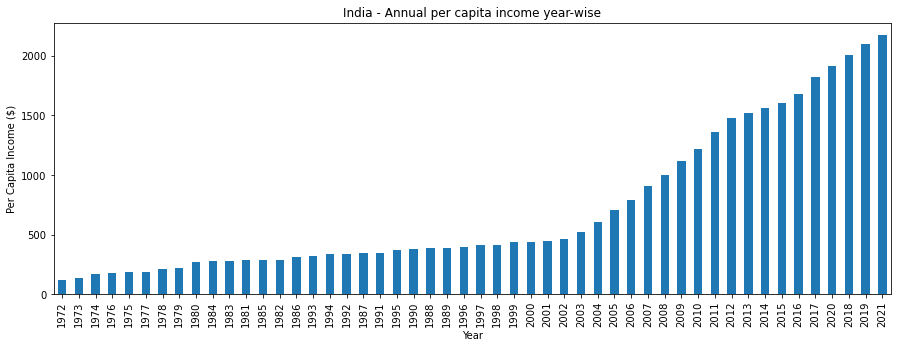

In [38]:
#Plot figure to show the bar chart for per-capita income growth from 1972-2021 (as available per the sample data set from World bank)

plt.figure(figsize = (15,5))
df_ind.groupby('Year_N')['Value'].sum().sort_values(ascending=True).plot(kind = 'bar')
plt.xlabel('Year')
plt.ylabel('Per Capita Income ($)')
plt.title('India - Annual per capita income year-wise')
plt.show()

We can see that the per-capita income has shown an incline specially a steeper one post 2000s.
Let's also look at the 'Population' growth trend over the years 1970-2021.

In [39]:
#Create a dataframe for Population growth as available in $s and from year 1970-2021

df_pop = ind_pop_t[ind_pop_t['Series Name'] == 'Population, total']
df_pop.head(5)

Country Name Country Code  Series Code        Series Name           Year  \
0          India          IND  SP.POP.TOTL  Population, total  1972 [YR1972]   
60         India          IND  SP.POP.TOTL  Population, total  1973 [YR1973]   
120        India          IND  SP.POP.TOTL  Population, total  1974 [YR1974]   
180        India          IND  SP.POP.TOTL  Population, total  1975 [YR1975]   
240        India          IND  SP.POP.TOTL  Population, total  1976 [YR1976]   

         Value  
0    581087255  
60   594770136  
120  608802595  
180  623102900  
240  637630085

In [40]:
#Split the Year field to transform into a more meaningful numeric Years

df_pop[['Year_N', 'Year_Ch']] = df_pop.Year.str.split(" ",expand=True)
df_pop.head(10)

C:\Users\vinee\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Name Country Code  Series Code        Series Name           Year  \
0          India          IND  SP.POP.TOTL  Population, total  1972 [YR1972]   
60         India          IND  SP.POP.TOTL  Population, total  1973 [YR1973]   
120        India          IND  SP.POP.TOTL  Population, total  1974 [YR1974]   
180        India          IND  SP.POP.TOTL  Population, total  1975 [YR1975]   
240        India          IND  SP.POP.TOTL  Population, total  1976 [YR1976]   
300        India          IND  SP.POP.TOTL  Population, total  1977 [YR1977]   
360        India          IND  SP.POP.TOTL  Population, total  1978 [YR1978]   
420        India          IND  SP.POP.TOTL  Population, total  1979 [YR1979]   
480        India          IND  SP.POP.TOTL  Population, total  1980 [YR1980]   
540        India          IND  SP.POP.TOTL  Population, total  1981 [YR1981]   

         Value Year_N   Year_Ch  
0    581087255   1972  [YR1972]  
60   594770136   1973  [YR1973]  
120  608802595   1974  [YR1974]  
180  623102900   1975  [YR1975]  
240  637630085   1976  [YR1976]  
300  652408766   1977  [YR1977]  
360  667499815   1978  [YR1978]  
420  682995348   1979  [YR1979]  
480  698952837   1980  [YR1980]  
540  715384997   1981  [YR1981]

In [41]:
#Convert the data types of Year_N and Value fields

df_pop['Year_N'] = df_pop['Year_N'].astype(int)
df_pop['Value'] = df_pop['Value'].astype(float)

df_pop.dtypes

<ipython-input-41-6370d1111fcb>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-41-6370d1111fcb>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Country Name     object
Country Code     object
Series Code      object
Series Name      object
Year             object
Value           float64
Year_N            int32
Year_Ch          object
dtype: object

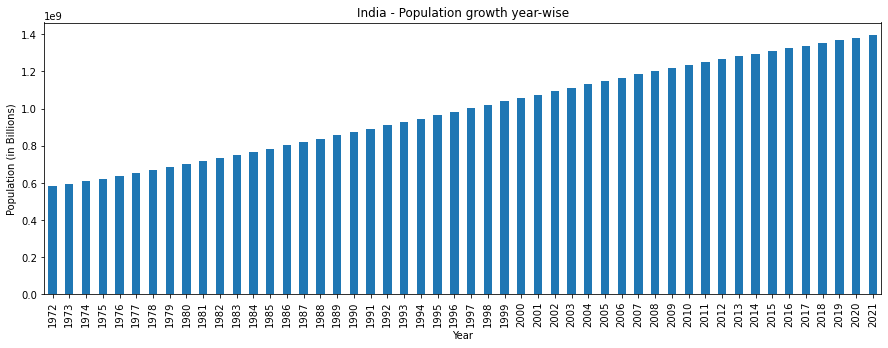

In [42]:
#Plot a bar chart for Population growth trend

plt.figure(figsize = (15,5))
df_pop.groupby('Year_N')['Value'].sum().sort_values(ascending=True).plot(kind = 'bar')
plt.xlabel('Year')
plt.ylabel('Population (in Billions)')
plt.title('India - Population growth year-wise')
plt.show()

Very obviously, the expected population trend was a growth, however what is interesting to see here is that it is almost a perfect linear growth trend!

Let's utilize all the data and analytics we have derived till now to see if there is a visual relation or pattern between:
1. Overall movies production trend
2. India's per capita income growth trend
3. Movies genres trend
4. India's population growth trend

Let's try to plot 4 graphs side by side to infer the trend and possible correlation based on data visualization only:

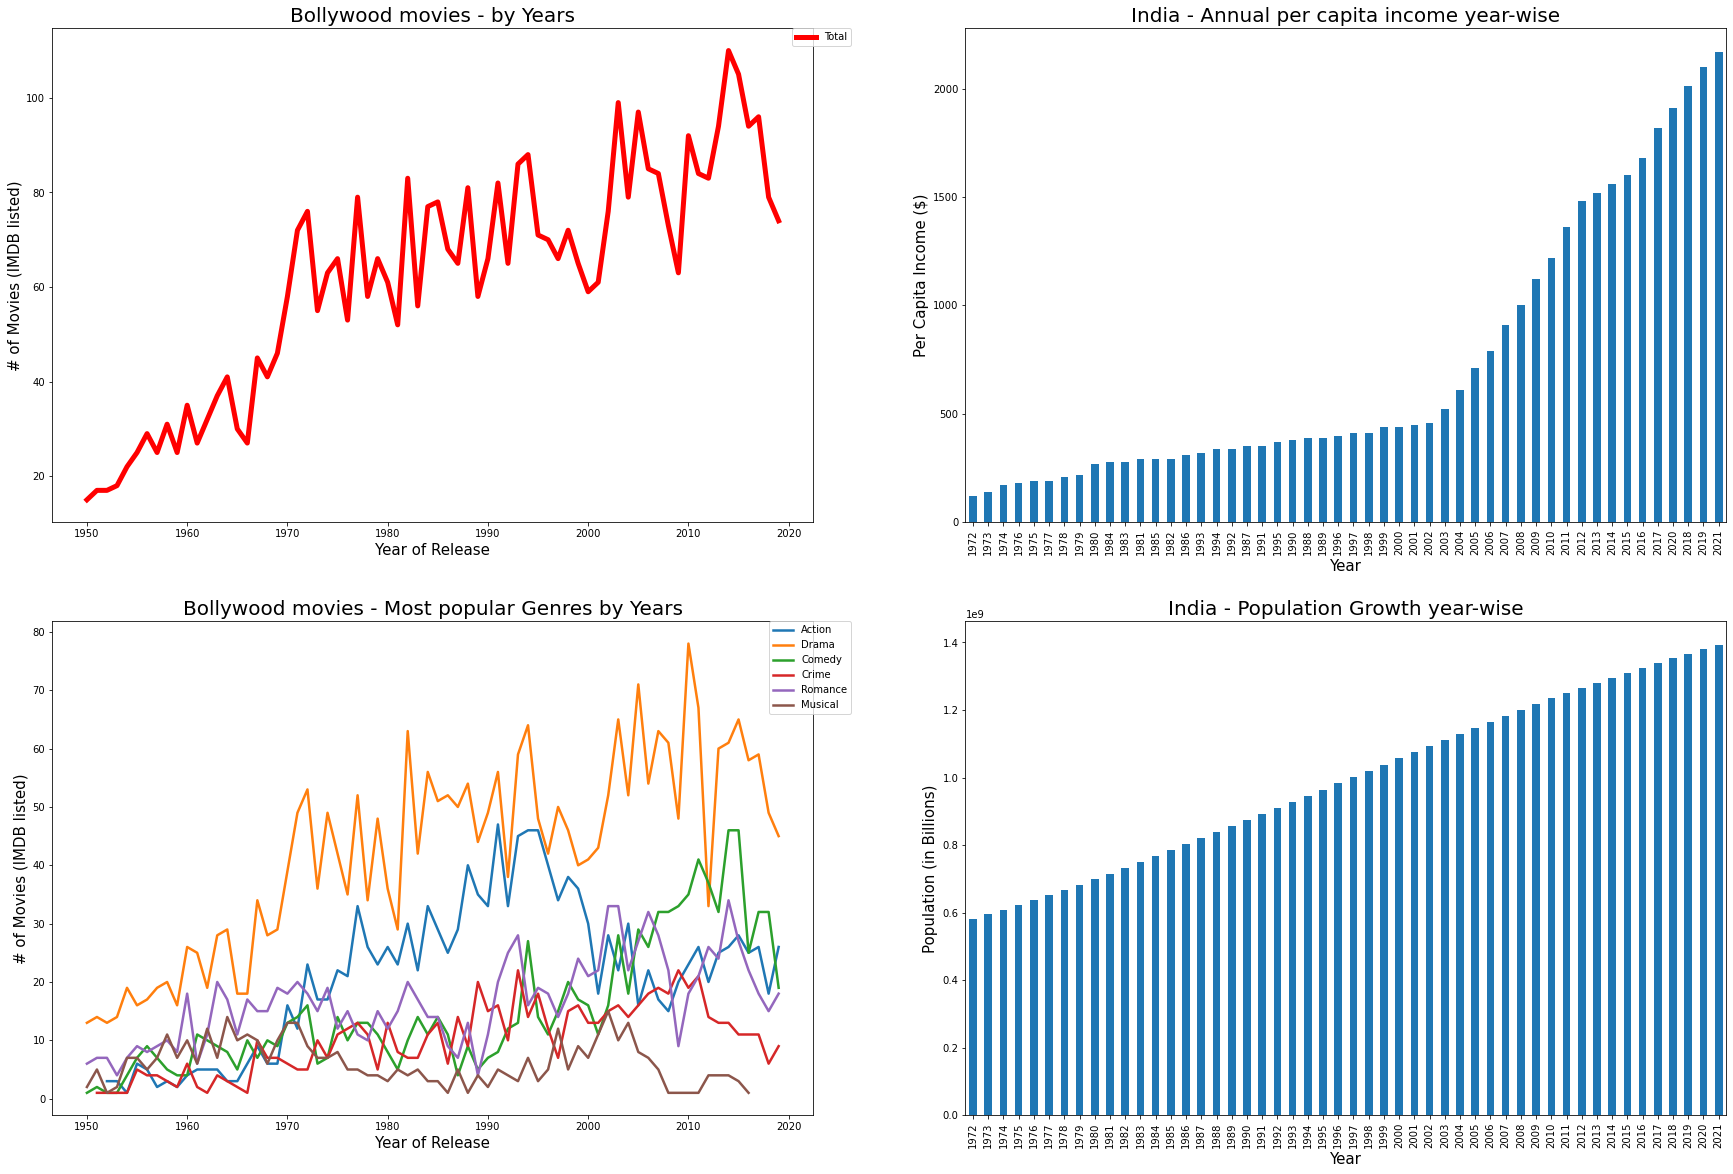

In [44]:
#Plotting side by side subplots on all 4 topics as mentioned above

plt.figure(figsize = (30,20))

#Overall movies production trend
plt.subplot(2, 2, 1)

bly_movies.sort_values('year_of_release').groupby(bly_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Total', linewidth=5, color = 'red')
plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper right', borderaxespad=0.)
plt.ylabel('# of Movies (IMDB listed)', fontsize = 15)
plt.xlabel('Year of Release', fontsize = 15)
plt.title('Bollywood movies - by Years', fontsize = 20)

#World Bank Data for India's annual per-capita income

plt.subplot(2, 2, 2)

df_ind.groupby('Year_N')['Value'].sum().sort_values(ascending=True).plot(kind = 'bar')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Per Capita Income ($)', fontsize = 15)
plt.title('India - Annual per capita income year-wise', fontsize = 20)

#Movies genres trend

plt.subplot(2,2,3)

action_movies.groupby(action_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Action', linewidth=2.5)

drama_movies.groupby(drama_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Drama', linewidth=2.5)

comedy_movies.groupby(comedy_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Comedy', linewidth=2.5)

crime_movies.groupby(crime_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Crime', linewidth=2.5)

romance_movies.groupby(romance_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Romance', linewidth=2.5)

musical_movies.groupby(musical_movies['year_of_release'], sort=False)['original_title'].size().plot(label = 'Musical', linewidth=2.5)

plt.legend(bbox_to_anchor=(1.05, 1),
                         loc='upper right', borderaxespad=0.)
plt.ylabel('# of Movies (IMDB listed)',fontsize = 15)
plt.xlabel('Year of Release', fontsize = 15)
plt.title('Bollywood movies - Most popular Genres by Years', fontsize = 20)

#India's population growth trend

plt.subplot(2,2,4)
df_pop.groupby('Year_N')['Value'].sum().sort_values(ascending=True).plot(kind = 'bar')
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Population (in Billions)', fontsize = 15)
plt.title('India - Population Growth year-wise', fontsize = 20)

plt.show()

Looking at the 4 visualizations across movies and socio-economic data, we can draw some key inferences as:

1. 1950s - 1970s older generation : Drama and Romance were the top genres


2. 1970s - 2000s middle generation : Drama and Action movies were the top genres


3. 2000s - 2020 new generation : Drama and Comdey movies are the top two genres by production


4. There is a steeper rise in per-capita income of India post 2000s, and coincidentally we see a steep rise in movies being produced as well the nominations won by Indian movies (refer wins and nominations).


5. This may be correlated that with higher income to spend, Indian population did find time and money for entertainmennt through movies, which may be the reason of higher quality and quantity rise in movies.


There may be some more correlation and deeper connections possible, which can be drived using the statistical analysis and correlation algorithms.
However, considering the scope of this course and exercise being limited to data visualizations method and analysis, I'll conclude at this point with the above mentioned ineferences.

Thanks! Hope you liked it!
